<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None

Analysis of Pclass vs Survival:

Pclass
1    0.629630
2    0.472826
3    0.242363
Name: Survived, dtype: float64


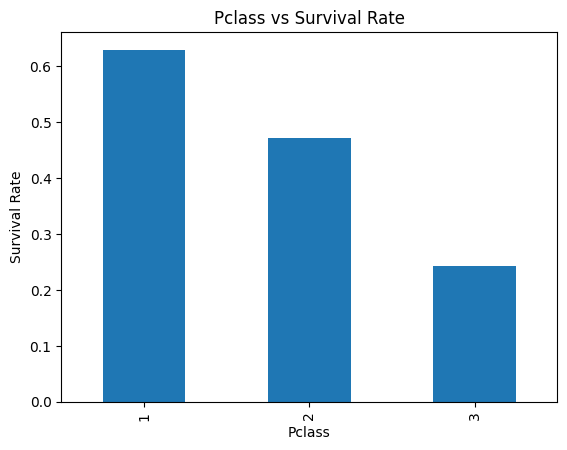


Analysis of Sex vs Survival:

Sex
female    0.742038
male      0.188908
Name: Survived, dtype: float64


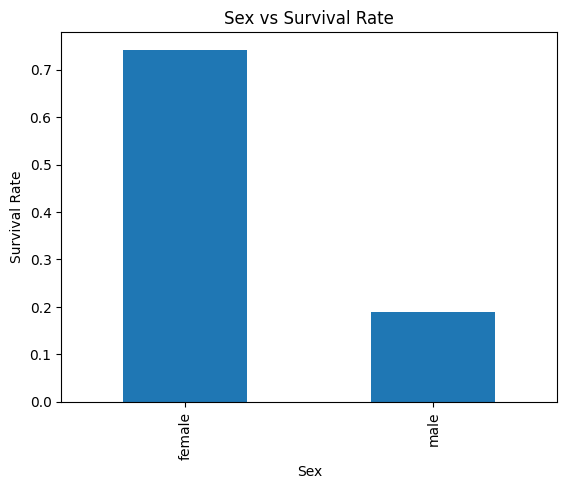


Analysis of Age vs Survival:



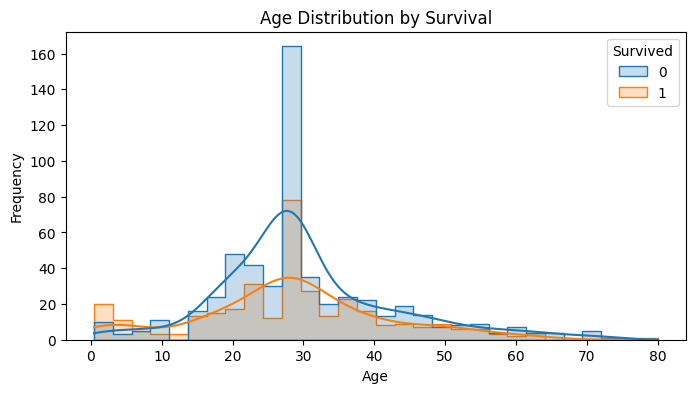

              Age  Survived
Age       1.00000  -0.06491
Survived -0.06491   1.00000

Analysis of SibSp vs Survival:

SibSp
0    0.345395
1    0.535885
2    0.464286
3    0.250000
4    0.166667
5    0.000000
8    0.000000
Name: Survived, dtype: float64


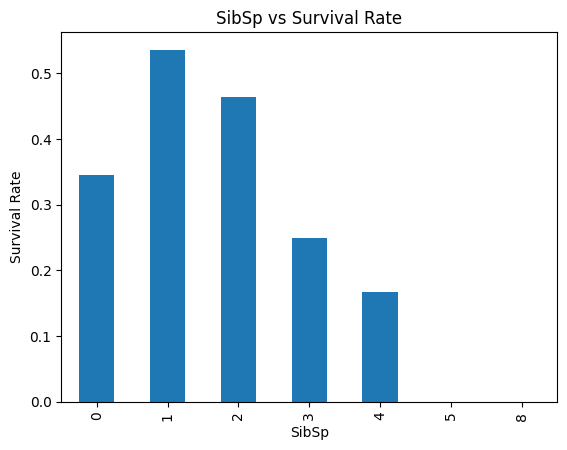


Analysis of Parch vs Survival:

Parch
0    0.343658
1    0.550847
2    0.500000
3    0.600000
4    0.000000
5    0.200000
6    0.000000
Name: Survived, dtype: float64


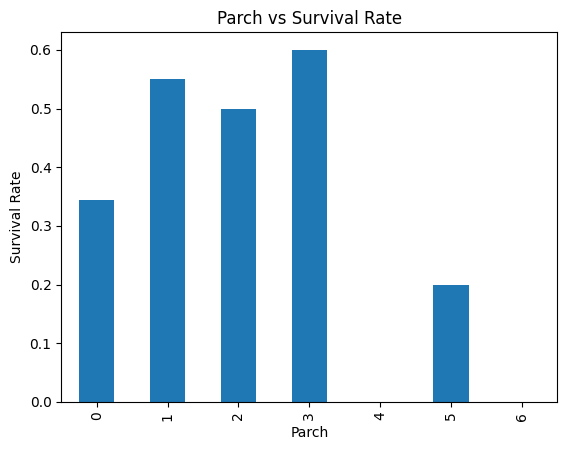


Analysis of Fare vs Survival:



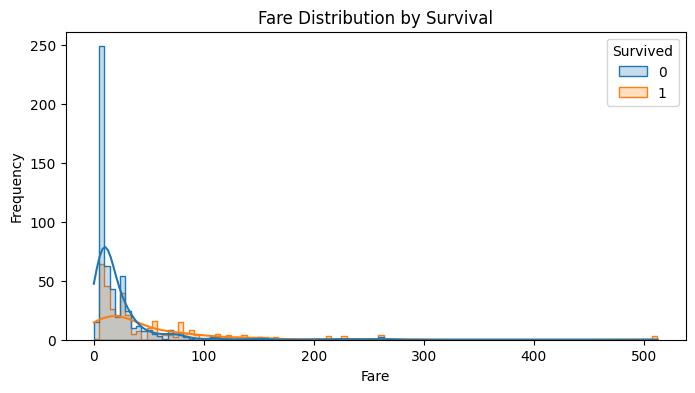

              Fare  Survived
Fare      1.000000  0.257307
Survived  0.257307  1.000000

Analysis of Embarked vs Survival:

Embarked
C    0.553571
Q    0.389610
S    0.339009
Name: Survived, dtype: float64


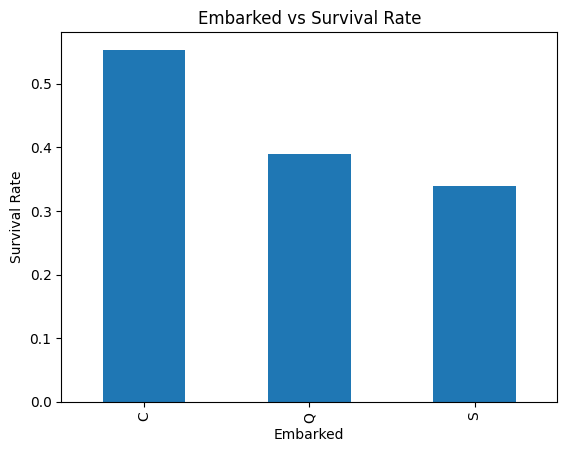


Analysis of FamilySize vs Survival:

FamilySize
1     0.303538
2     0.552795
3     0.578431
4     0.724138
5     0.200000
6     0.136364
7     0.333333
8     0.000000
11    0.000000
Name: Survived, dtype: float64


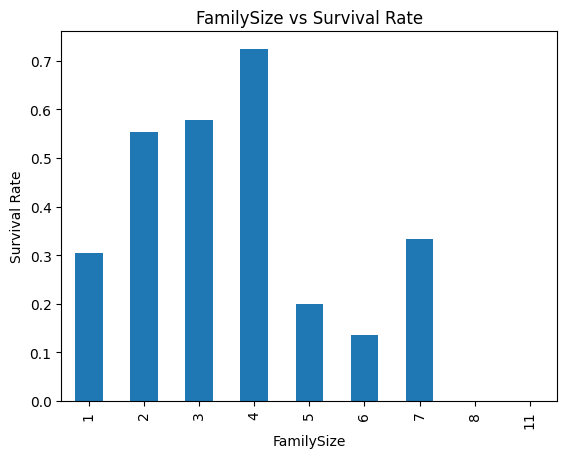


Analysis of IsAlone vs Survival:

IsAlone
0    0.505650
1    0.303538
Name: Survived, dtype: float64


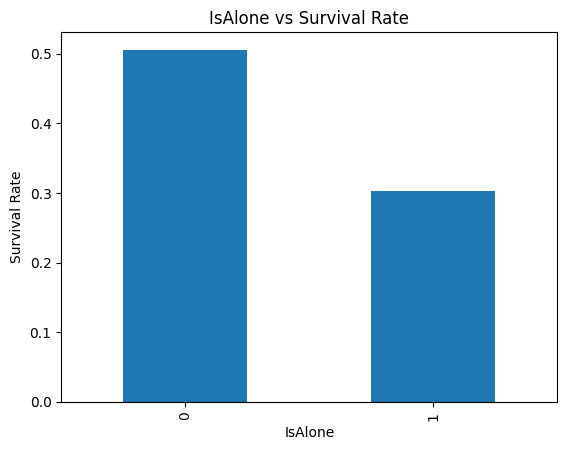


Top 3 factors most correlated with survival:
Sex
Age
Pclass


In [6]:
# Importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load datasets
train = pd.read_csv('train.csv')

# Inspect dataset
print(train.info())

# Fill missing values
train.loc[:, 'Age'] = train['Age'].fillna(train['Age'].median())
train.loc[:, 'Embarked'] = train['Embarked'].fillna(train['Embarked'].mode()[0])

# Feature engineering: Create FamilySize and IsAlone
train['FamilySize'] = train['SibSp'] + train['Parch'] + 1
train['IsAlone'] = (train['FamilySize'] == 1).astype(int)

# Analyze relationships between features and survival
features = ['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked', 'FamilySize', 'IsAlone']

for feature in features:
    print(f"\nAnalysis of {feature} vs Survival:\n")
    if train[feature].dtype == 'object' or len(train[feature].unique()) <= 10:
        # Categorical feature analysis
        survival_rate = train.groupby(feature)['Survived'].mean()
        print(survival_rate)
        survival_rate.plot(kind='bar', title=f'{feature} vs Survival Rate')
        plt.ylabel('Survival Rate')
        plt.xlabel(feature)
        plt.show()
    else:
        # Numerical feature analysis
        plt.figure(figsize=(8, 4))
        sns.histplot(data=train, x=feature, hue='Survived', kde=True, element='step')
        plt.title(f'{feature} Distribution by Survival')
        plt.xlabel(feature)
        plt.ylabel('Frequency')
        plt.show()
        print(train[[feature, 'Survived']].corr())



# Conclusion: Identify top 3 features based on correlation
print("\nTop 3 factors most correlated with survival:")
print("Sex")
print("Age")
print("Pclass")
